In [34]:
import pandas as pd
import numpy as np

- Libraries for visualization 

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as make_subplots

In [36]:
import datetime as dt

In [37]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import LSTM

In [39]:
from itertools import cycle

- LOADING THE DATA

In [40]:
df=pd.read_csv('C:/Users/chand/Downloads/archive (2).zip')
df.set_index('Date',inplace=True)
df.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100323  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095089  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088110  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090291   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092908   73449600

In [41]:
print("Number of days present in the datset:",df.shape[0])
print("Number of fields in the dataset:",df.shape[1])

Number of days present in the datset: 10409
Number of fields in the dataset: 6


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 1980-12-12 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10409 non-null  float64
 1   High       10409 non-null  float64
 2   Low        10409 non-null  float64
 3   Close      10409 non-null  float64
 4   Adj Close  10409 non-null  float64
 5   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 569.2+ KB


In [43]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  10409.000000  10409.000000  10409.000000  10409.000000  10409.000000   
mean      13.959910     14.111936     13.809163     13.966757     13.350337   
std       30.169244     30.514878     29.835055     30.191696     29.911132   
min        0.049665      0.049665      0.049107      0.049107      0.038384   
25%        0.281964      0.287946      0.274554      0.281250      0.234799   
50%        0.468750      0.477679      0.459821      0.468750      0.386853   
75%       14.217857     14.364286     14.043571     14.206071     12.188149   
max      182.630005    182.940002    179.119995    182.009995    181.778397   

             Volume  
count  1.040900e+04  
mean   3.321778e+08  
std    3.393344e+08  
min    0.000000e+00  
25%    1.247604e+08  
50%    2.199680e+08  
75%    4.126108e+08  
max    7.421641e+09

In [44]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

- check for  null values 

In [45]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- data plotting

In [46]:
data=df.iloc[2300:].copy()

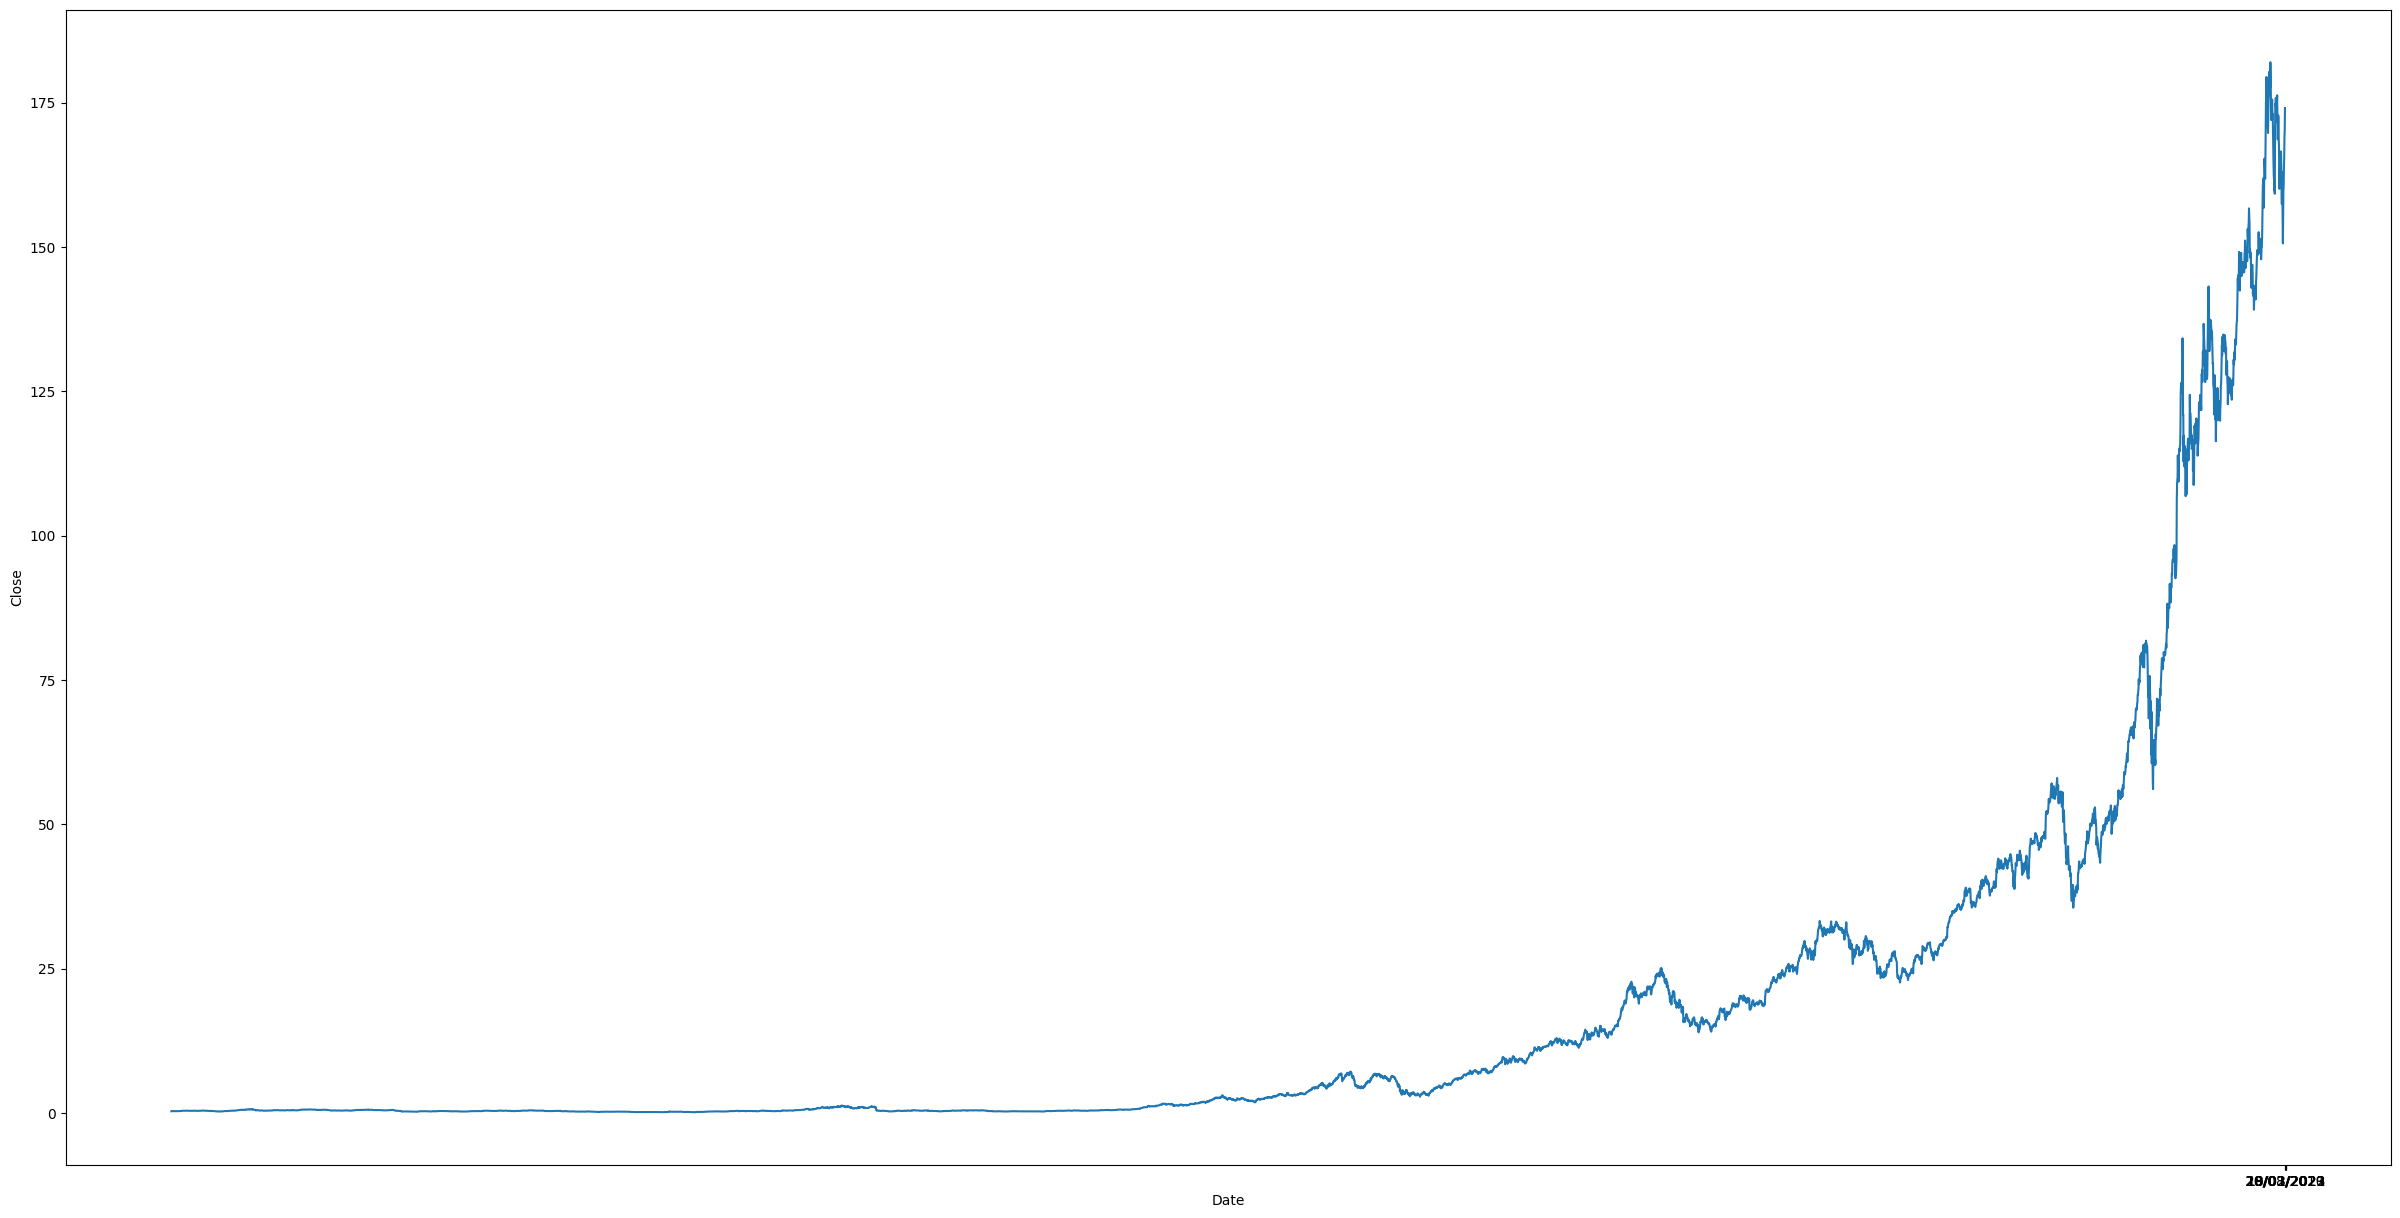

In [47]:
plt.figure(figsize=(30,15))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['20/08/2019','18/03/2020','29/02/2021','18/03/2022','10/01/2023'])
plt.show()

In [48]:
data=df.iloc[2300:].copy()


In [49]:
names=cycle(['Stock Open Price','Stock high price','Stock low price','Stock close price'])

In [50]:
fig=px.line(data,x=data.index, y=[data['Open'],data['High'],data['Low'],data['Close']],labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='ANALYSIS OF STOCKS', font_size=16,font_color='black',legend_title_text='STOCK PARAMETERS')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True)
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.show()


- Moving Averages

In [51]:
ma_day=[30,60,120,150]


In [52]:
for ma in ma_day:
    column_name=f'MA for {ma} days'
    data[column_name]=data['Close'].rolling(ma).mean()

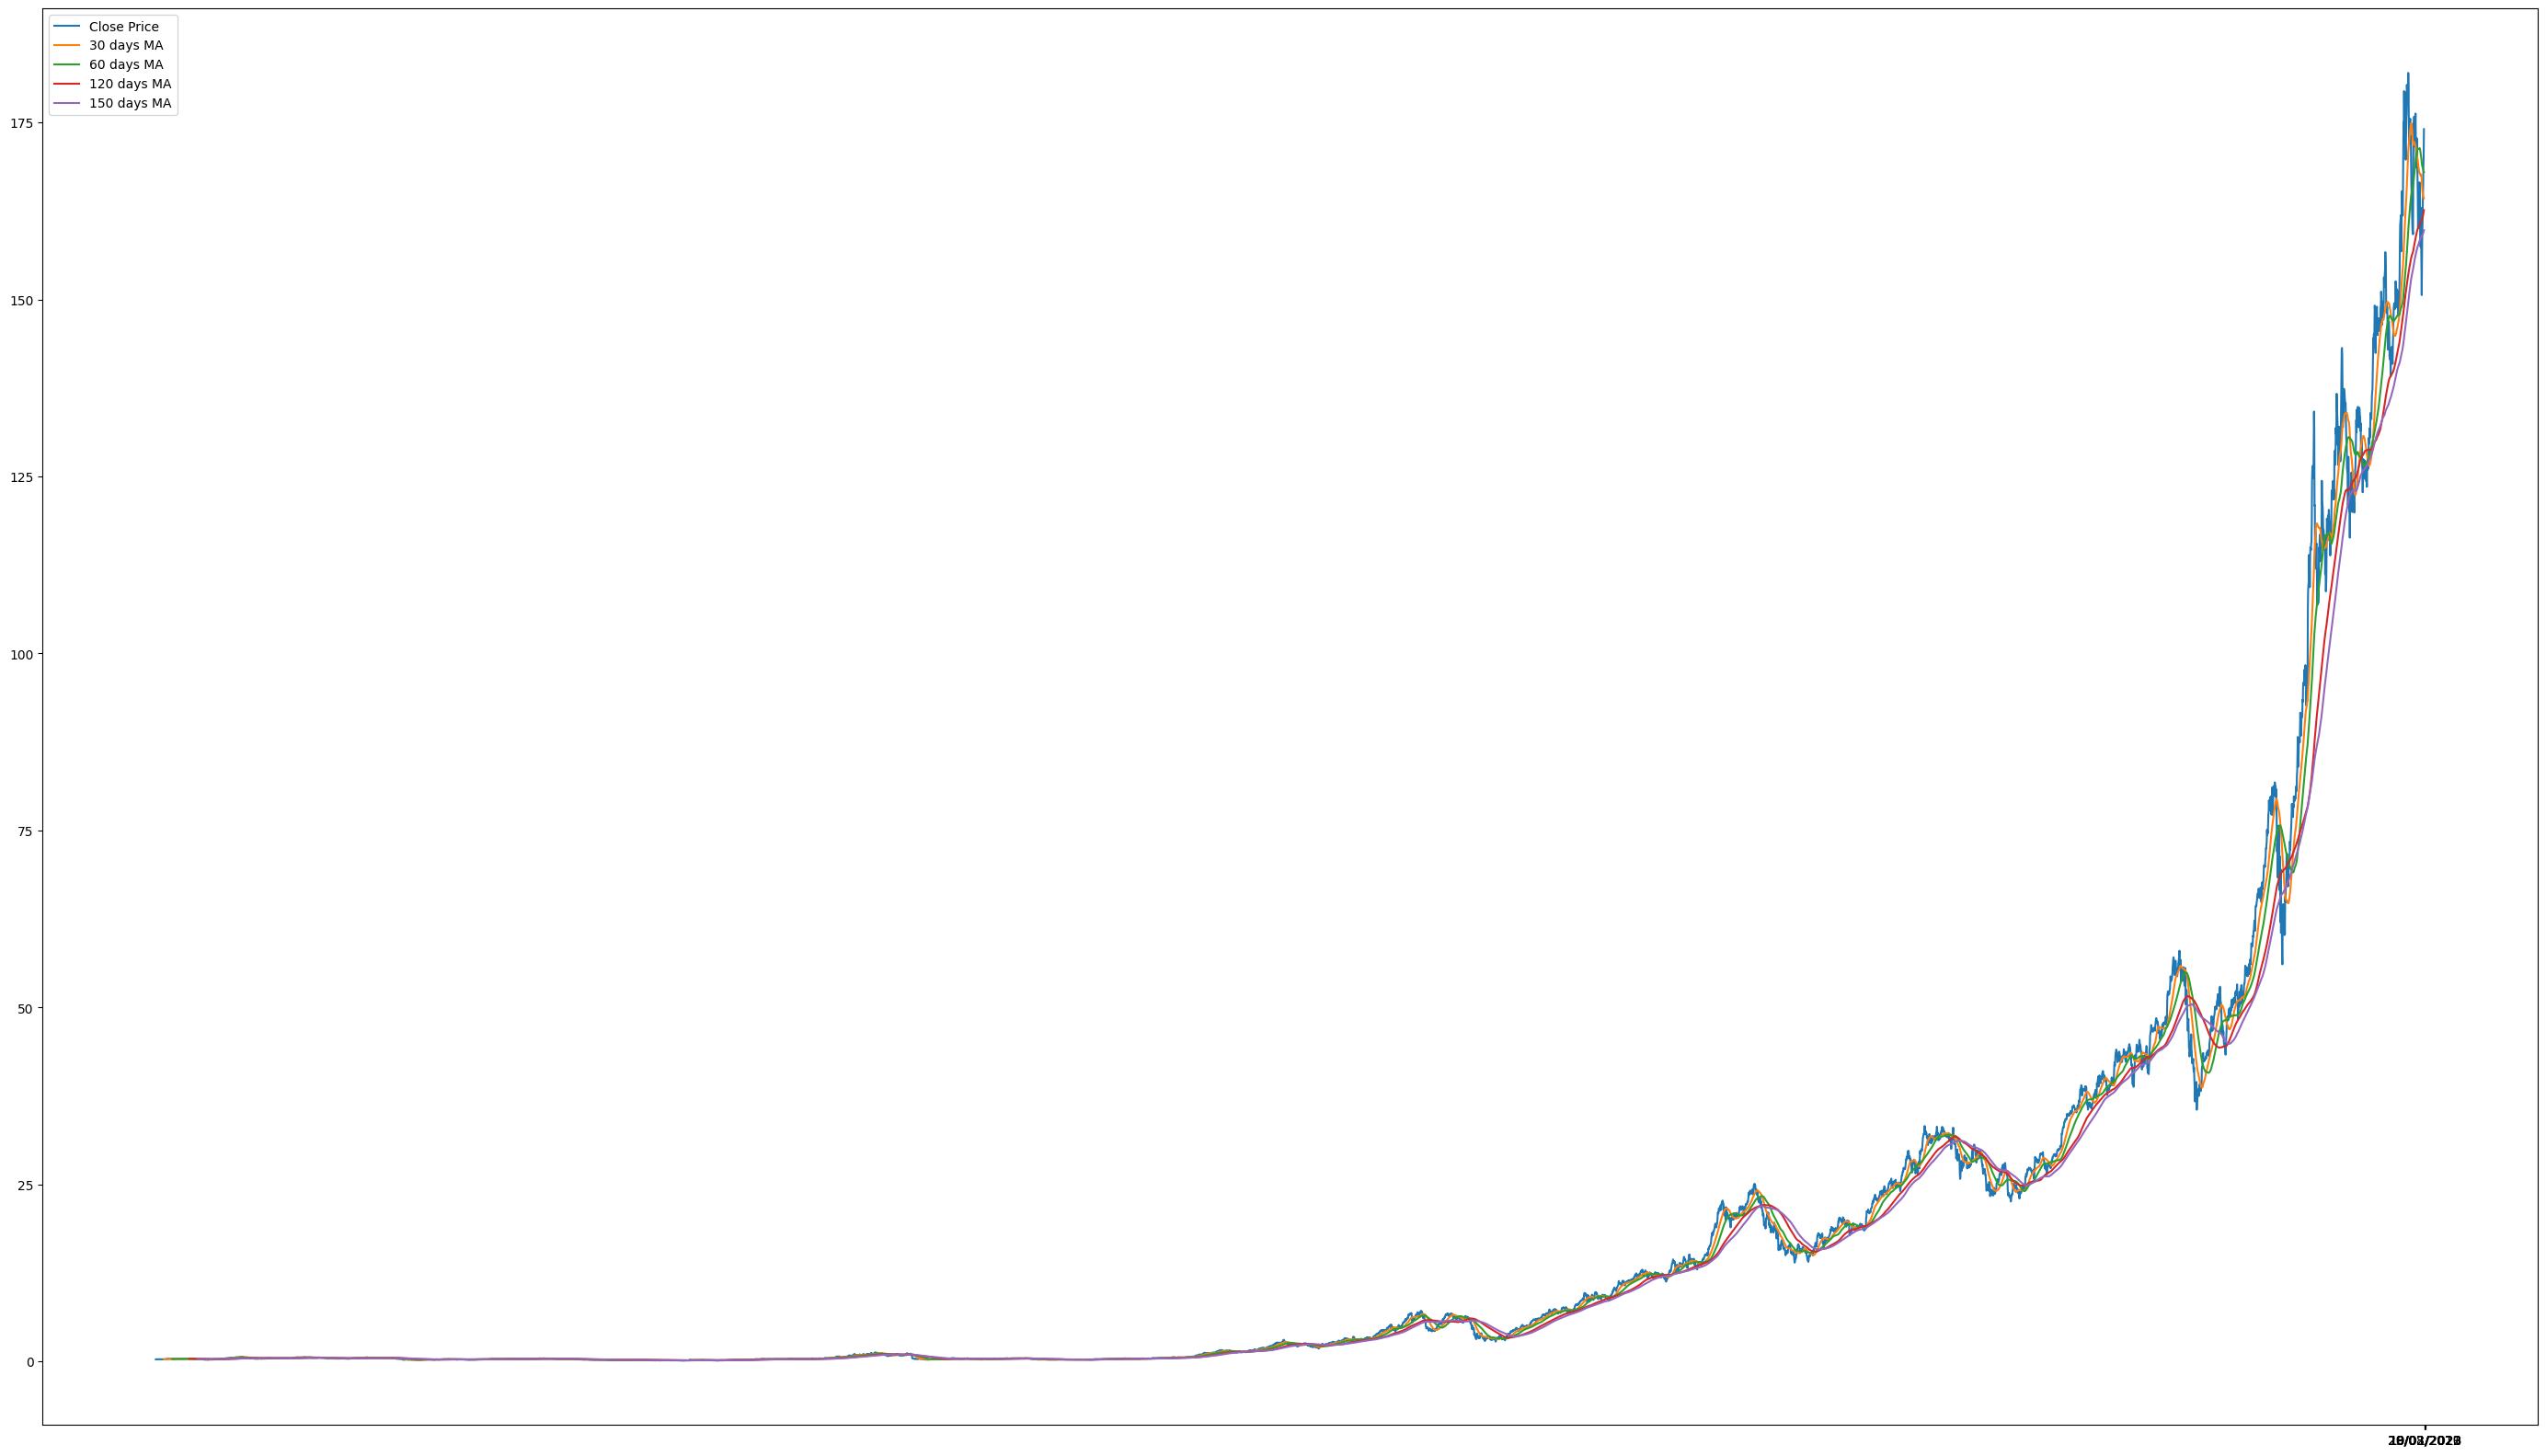

In [53]:
plt.figure(figsize=(35,20))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['20/08/2019','18/03/2020','29/02/2021','18/03/2022','10/01/2023'])
plt.legend()
plt.show()

In [54]:
names=cycle(['Close Price', 'MA for 30 days','MA for 60 days','MA for 120 days','MA for 150 days'])


In [56]:
fig = px.line(data, 
              x=data.index,
              y=[data['Close'], data['MA for 30 days'], data['MA for 60 days'], data['MA for 120 days'], data['MA for 150 days']],
              labels={'x': 'Date', 'y': 'Values'})

fig.update_layout(title_text='Moving Average Analysis', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.show()


- SPLITTING THE TIME-SERIES DATA

In [57]:
new_df=data['Close']
new_df.index=data.index

In [58]:
final_df=new_df.values

In [60]:
train_data=final_df[0:646,]
test_data=final_df[646:,]

In [61]:
train_df=pd.DataFrame()
test_df=pd.DataFrame()

In [65]:
train_df['Close']=train_data
train_df.index=new_df[0:646].index
test_df['Close']=test_data
test_df.index=new_df[646:].index


In [66]:
print('train_data:',train_df.shape)
print('test_data:',test_df.shape)


train_data: (646, 1)
test_data: (7463, 1)


- SCALING USING MIN-MAX SCALAR

In [69]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

In [74]:
X_train_data,y_train_data=[],[]

In [75]:
for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [76]:
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)
X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

- MODEL BUILDING USING LSTM MODEL

In [77]:
#initializing the LSTM model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape= (X_train_data.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))



In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [79]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_data,y_train_data,epochs=150,batch_size=32)

Epoch 1/150
19/19 [==============================] - 6s 51ms/step - loss: 8.0311e-05
Epoch 2/150
19/19 [==============================] - 1s 52ms/step - loss: 5.7128e-06
Epoch 3/150
19/19 [==============================] - 1s 49ms/step - loss: 1.5125e-06
Epoch 4/150
19/19 [==============================] - 1s 50ms/step - loss: 5.2411e-07
Epoch 5/150
19/19 [==============================] - 1s 49ms/step - loss: 3.2087e-07
Epoch 6/150
19/19 [==============================] - 1s 48ms/step - loss: 3.2623e-07
Epoch 7/150
19/19 [==============================] - 1s 49ms/step - loss: 2.8139e-07
Epoch 8/150
19/19 [==============================] - 1s 47ms/step - loss: 2.9152e-07
Epoch 9/150
19/19 [==============================] - 1s 49ms/step - loss: 2.8017e-07
Epoch 10/150
19/19 [==============================] - 1s 53ms/step - loss: 2.9058e-07
Epoch 11/150
19/19 [==============================] - 1s 47ms/step - loss: 2.6803e-07
Epoch 12/150
19/19 [==============================] - 1s 48ms/s

- PREDICTIONS

In [80]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [81]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)


In [82]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [83]:
predicted=model.predict(X_test)
predicted=scaler.inverse_transform(predicted)

234/234 [==============================] - 5s 16ms/step


In [84]:
test_df['Predictions']=predicted

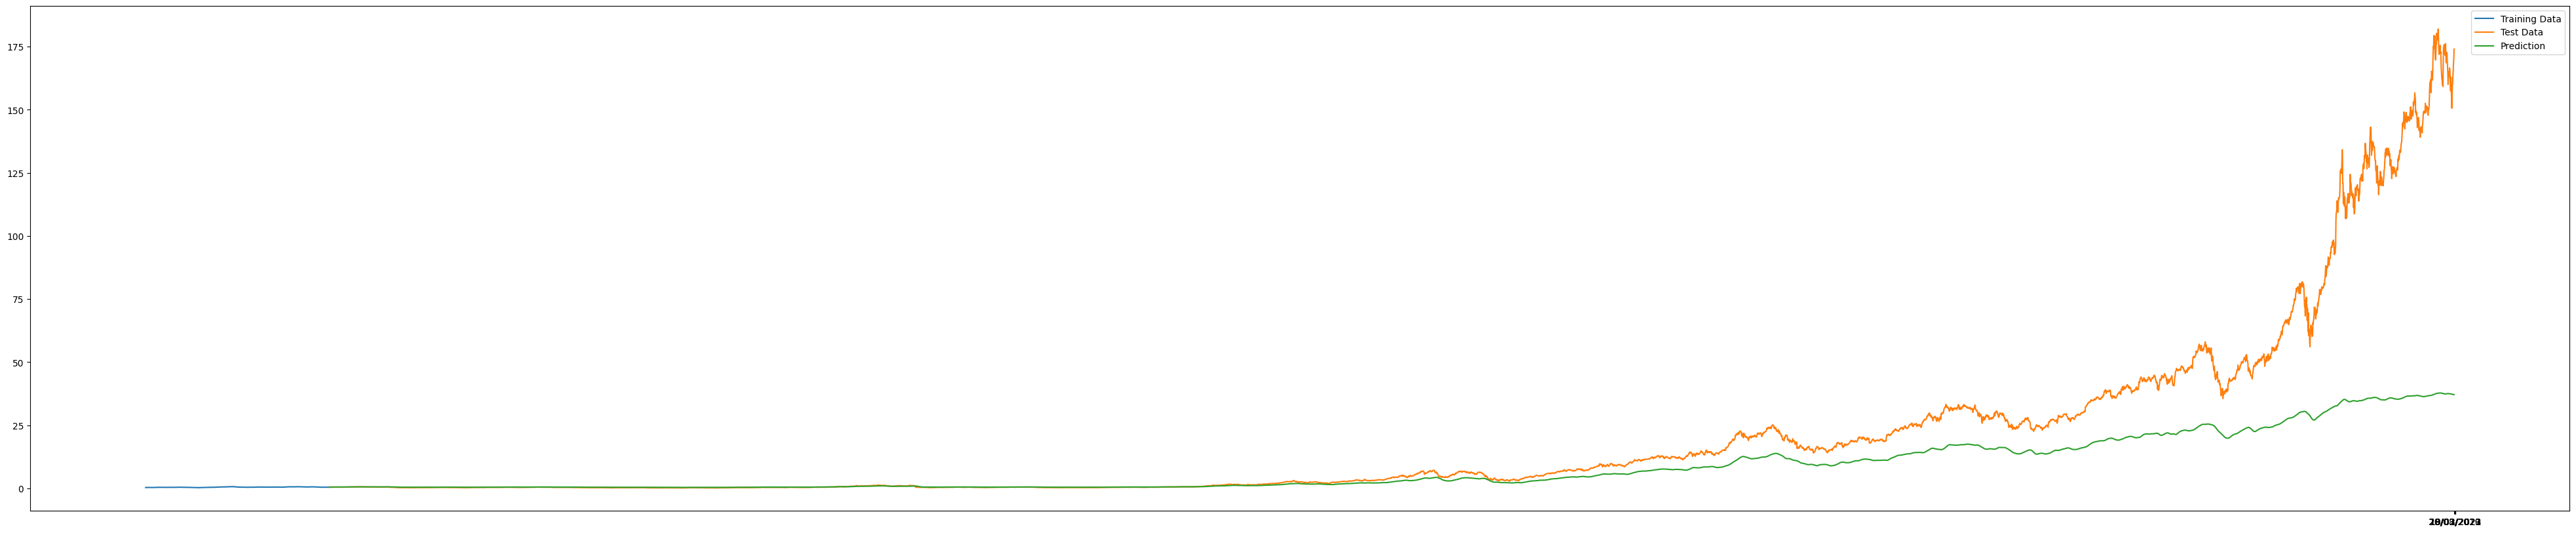

In [86]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'], label='Prediction')
plt.xticks(['20/08/2019','18/03/2020','29/02/2021','18/03/2022','10/01/2023'])
plt.legend()
plt.show()


In [88]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=train_df.index,y=train_df['Close'],
                         mode='lines',
                         name='Training Data'))
fig.add_trace(go.Scatter(x=test_df.index,y=test_df['Close'],
                         mode='lines',
                        name='Test Data'))
fig.add_trace(go.Scatter(x=test_df.index,y=test_df['Predictions'],
                         mode='lines',
                         name='Prediction'))

In [89]:
print('The Mean Squarred Error is',mean_squared_error(test_df['Close'].values,test_df['Predictions'].values))
print('The Mean Absolute Error is',mean_absolute_error(test_df['Close'].values,test_df['Predictions'].values))
print('The Root Mean Squarred Error is',np.sqrt(mean_squared_error(test_df['Close'].values,test_df['Predictions'].values)))

The Mean Squarred Error is 738.4816206763247
The Mean Absolute Error is 11.380179629381075
The Root Mean Squarred Error is 27.175018319705412
